## DATA importing from Binance  and have usefule data set with Pandas 

In [92]:
from  binance.client import Client
import ta
import pandas as pd
import numpy as np  
import matplotlib as mlp 
import matplotlib.pyplot as plt

paire_name = "XRPUSDT" 
interval_time=Client.KLINE_INTERVAL_1HOUR 
date_for_start = "24/02/2020"

giveme=Client().get_historical_klines(paire_name,interval_time,date_for_start)
df=pd.DataFrame(giveme ,columns=["timestamp","open","high","low","close","volume","closetime","quote_avg","trades","tp","tv","dt2"] )


del df["dt2"]
del df["tp"]
del df ["trades"]
del df ["closetime"]
del df["tv"] 
df["volume"]=pd.to_numeric(df["volume"])
df["open"]=pd.to_numeric(df["open"])
df["high"]=pd.to_numeric(df["high"])
df["low"]=pd.to_numeric(df["low"])
df["close"]=pd.to_numeric(df["close"])  
df=df.set_index(df["timestamp"]) 
df.index=pd.to_datetime(df.index , unit="ms") 


In [151]:
plt.style.use('seaborn-bright')

# The Moving Average "trend following" strategy 
This is the simplest and sometimes the most effective strategy, based on two indicators, the 200 and 600 moving average.
The moving average 200 is calculated according to the last 200 observation and 600 according to the last 600 observation.  
we see how work with a graphical tools  so let's go !!


In [118]:
df["MB200"]=ta.trend.sma_indicator(df['close'],200)  ##Moving avrege 200 
df["MB600"]=ta.trend.sma_indicator(df['close'],600)  ##Moving avrege  600   

 ## graphical representation 

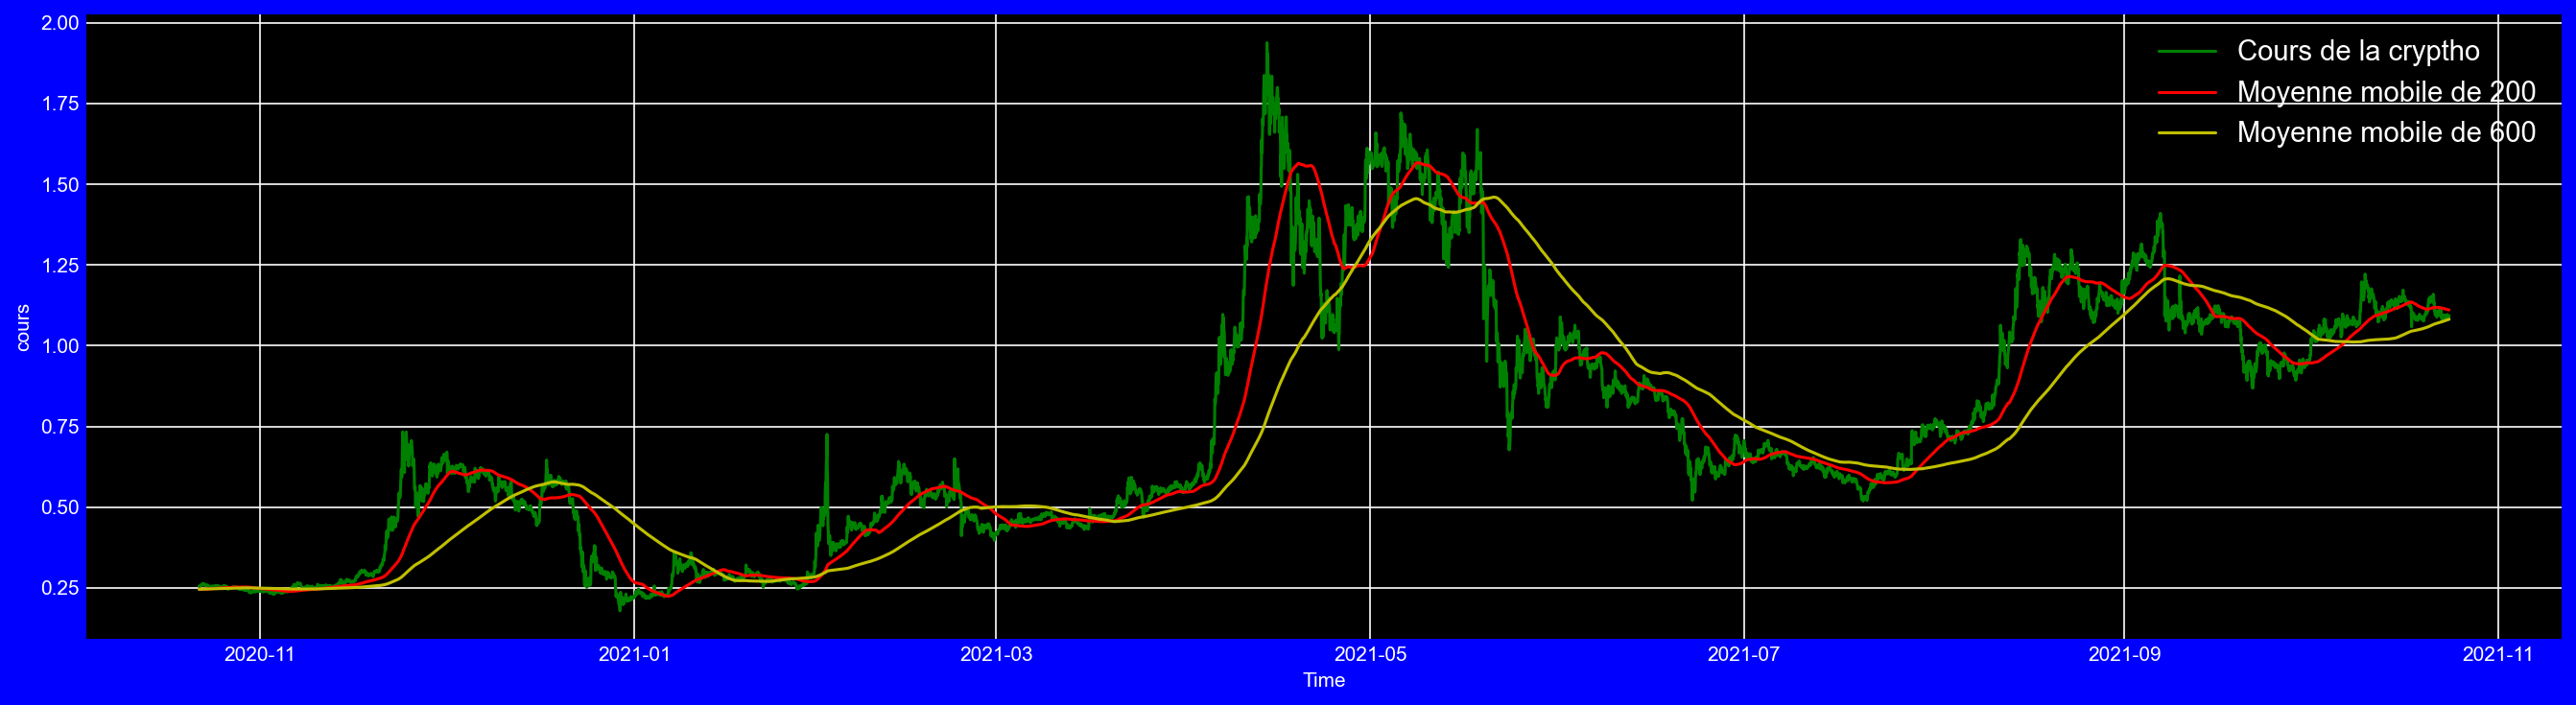

In [235]:
fig=plt.figure(figsize=(18, 5), dpi= 150, facecolor='b', edgecolor='k')
plt.plot(df['close']["22-10-2020":"23-10-2021"] ,'g-',label="Cours de la cryptho")  
plt.plot(df['MB200']["22-10-2020":"23-10-2021"],'r-', label ="Moyenne mobile de 200" ) 
plt.plot(df['MB600']["22-10-2020":"23-10-2021"],'y-', label ="Moyenne mobile de 600" ) 
plt.xlabel("Time") 
plt.ylabel("cours") 
plt.legend(loc = 'upper right',fontsize = 14)
plt.tight_layout()
plt.show()

 <font size="4"> So as we can see we have three curves, the green one is the coin's price fluctuations, we can see immediately that the red and yellow curves flow price fluctuation.    logic  :')  .  the strategy tells us that we have to buy when the red curve is higher than yellow because that is a situation of increasing trend and we have to sell if the yellow is higher than the reading because there's an increasing trend. take it easy  


## Simulation function of The Moving Average strategy : 

In [304]:

def simule_mb_statgy(m ,ds) :
    coin=0  
    rowlist=[] 
    n=m
    

    for index, row in ds.iterrows() : 
        if ds["MB200"][index] > ds["MB600"][index] and m>10 : 
           coin=m/ds["close"][index]  
           coin=coin-coin*0.007 
           m=0 
           bot_portefeuille = m +coin*ds['close'][index] 
           buyand_hold=(n/ds['close'][0])*ds['close'][index] 
           performance=((bot_portefeuille-buyand_hold)/buyand_hold)*100  
           rendement =((bot_portefeuille-n)/n)*100
           achat=["j'ai acheter cette quantité de coin ",str(coin)," à ",str(coin*ds['close'][index])," a la date ",str(index)] 
           dict1={'date':index ,'Usdt':m ,'coin':coin,"operation":"".join(achat) ,"portfolo":bot_portefeuille , "if_Ihold":buyand_hold ,"rendement %":rendement,
                  "performance %": performance}  
           rowlist.append(dict1) 
    
           

        if ds["MB200"][index] < ds["MB600"][index] and coin>0.0001 :   
           m=coin*ds['close'][index ] 
           m=m-m*0.007 
           coin=0   
           bot_portefeuille = m +coin*ds['close'][index] 
           buyand_hold=(n/ds['close'][0])*ds['close'][index] 
           vente = ["j'ai vendu tous les coins  à ",str(m)," a la date ",str(index)]  
           performance=((bot_portefeuille-buyand_hold)/buyand_hold)*100 
           rendement =((bot_portefeuille-n)/n)*100
           dict1={'date':index ,'Usdt':m ,'coin':coin,"operation":"".join(vente) ,"portfolo":bot_portefeuille , "if_Ihold":buyand_hold , "rendement %":rendement,
                  "performance %": performance}  
           rowlist.append(dict1)  
          
           
    simulate1=pd.DataFrame(rowlist)
    
    return   simulate1   

### resault of simulation : 

In [305]:
simule_mb_statgy(200, df)    

,date,Usdt,coin,operation,portfolo,if_Ihold,rendement %,performance %
0,2020-04-01 16:00:00,0.000000,1175.426136,j'ai acheter cette quantité de coin 1175.42613...,198.600000,119.634639,-0.700000,66.005433
1,2020-05-15 08:00:00,235.388852,0.000000,j'ai vendu tous les coins à 235.3888515980113...,235.388852,142.795440,17.694426,64.843395
2,2020-06-03 00:00:00,0.000000,1152.626508,j'ai acheter cette quantité de coin 1152.62650...,233.741130,143.588473,16.870565,62.785442
3,2020-06-13 03:00:00,219.720823,0.000000,j'ai vendu tous les coins à 219.7208228403110...,219.720823,135.927211,9.860411,61.645944
4,2020-07-10 04:00:00,0.000000,1108.990429,j'ai acheter cette quantité de coin 1108.99042...,218.182777,139.304680,9.091389,56.622718
5,2020-08-25 06:00:00,313.497444,0.000000,j'ai vendu tous les coins à 313.4974436738929...,313.497444,201.571904,56.748722,55.526359
6,2020-10-08 04:00:00,0.000000,1263.302336,j'ai acheter cette quantité de coin 1263.30233...,311.302962,174.481342,55.651481,78.416189
7,2020-10-21 18:00:00,316.700775,0.000000,j'ai vendu tous les coins à 316.7007745221943...,316.700775,178.758054,58.350387,77.167276
8,2020-10-23 15:00:00,0.000000,1234.674214,j'ai acheter cette quantité de coin 1234.67421...,314.483869,180.351200,57.241935,74.373039
9,2020-10-31 08:00:00,295.608454,0.000000,j'ai vendu tous les coins à 295.6084536888191...,295.608454,170.721518,47.804227,73.152428


 <font size="4"> So in this period we have 23 operation so in the start we have 200usdt but in the end we have 721,21 usdt , so we are happy with this stratgy we can spend money now , and  we have 164% of performance more then Market why not graphical representation to see  

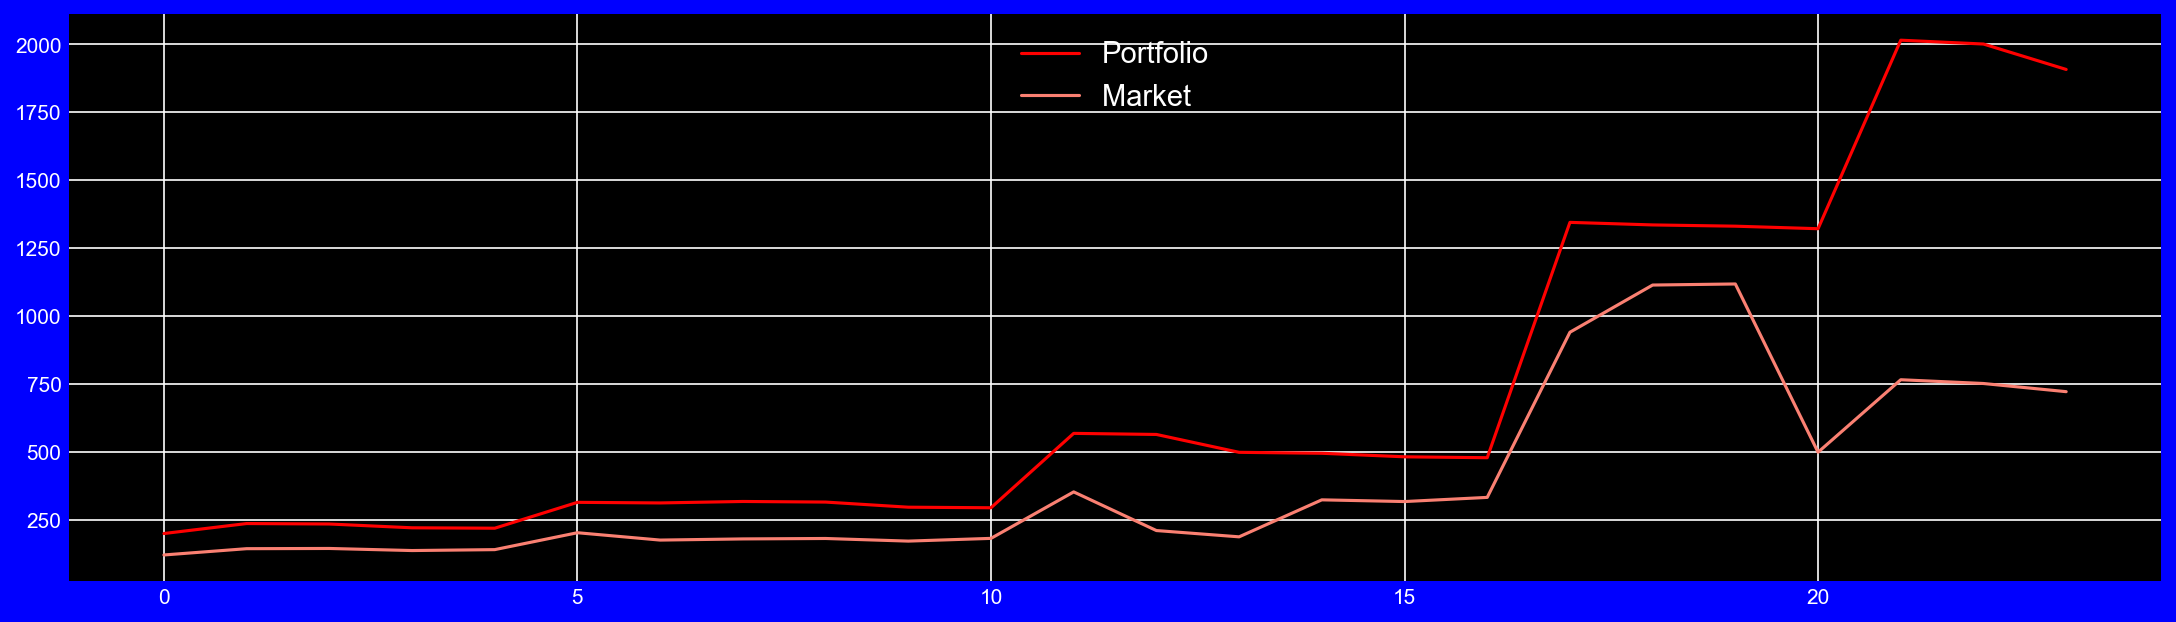

In [173]:
fig=plt.figure(figsize=(18, 5), dpi= 150, facecolor='b', edgecolor='k') 
plt.plot(simule_mb_statgy(200, df)["portfolo"] , "r-" , label="Portfolio") 
plt.plot(simule_mb_statgy(200, df)["if_Ihold"] , "salmon" , label="Market ") 
plt.legend(loc = 'upper center',fontsize = 14)

#  Trix strategy ("Triple Moyenne expontielle ")  
   this statgy come more and more famous so we have to use it in our bot , but this stargy need to be optimaised we will see how . 
   this stratgy tell us that we have to calculate Moving avrege of the movieng avrege of the moving avrege of the price . 
   and we have to calculate also to calculate the 4th moving avrege but with an anthore parameter and after this work whe have to see how we can made 
opportunity with this tools and for more precision we use sthocastic rsi so let's go  

we have two parmetere the frist trix lenght is lenght of sample that we use to calculate 3MVA 
the trix_signal is the length of sample of trix which help us to calculate the trix's moving avrege  
i optimased that with itteration but manual way so they can be not the best parametere but i have with this a good result so i'm oky with that 

In [225]:
##trix indecator  

trix_length= 150  ##prametre optimiser à la main de cette stratigie  
trix_signal=2520 ##prametre optimiser  à la main de cette stratigie 


In [ ]:
df["TRIX"]=ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(df['close'],window=trix_length),window=trix_length),window=trix_length)  
df["TRIX_PCT"]=df["TRIX"].pct_change()*100   #### corriger en point d'echage 
df["TRIX_singal"]=ta.trend.sma_indicator(df["TRIX_PCT"],trix_signal) 
df["TRIX_histo"]=df["TRIX_PCT"]-df["TRIX_singal"]  
df["stoch_rsi"]=ta.momentum.stochrsi(df["close"] , window=14 ,smooth1=3 ,smooth2=3 ) ## stchastic rsi est tres connu par le parametre 14 

## graphical representation

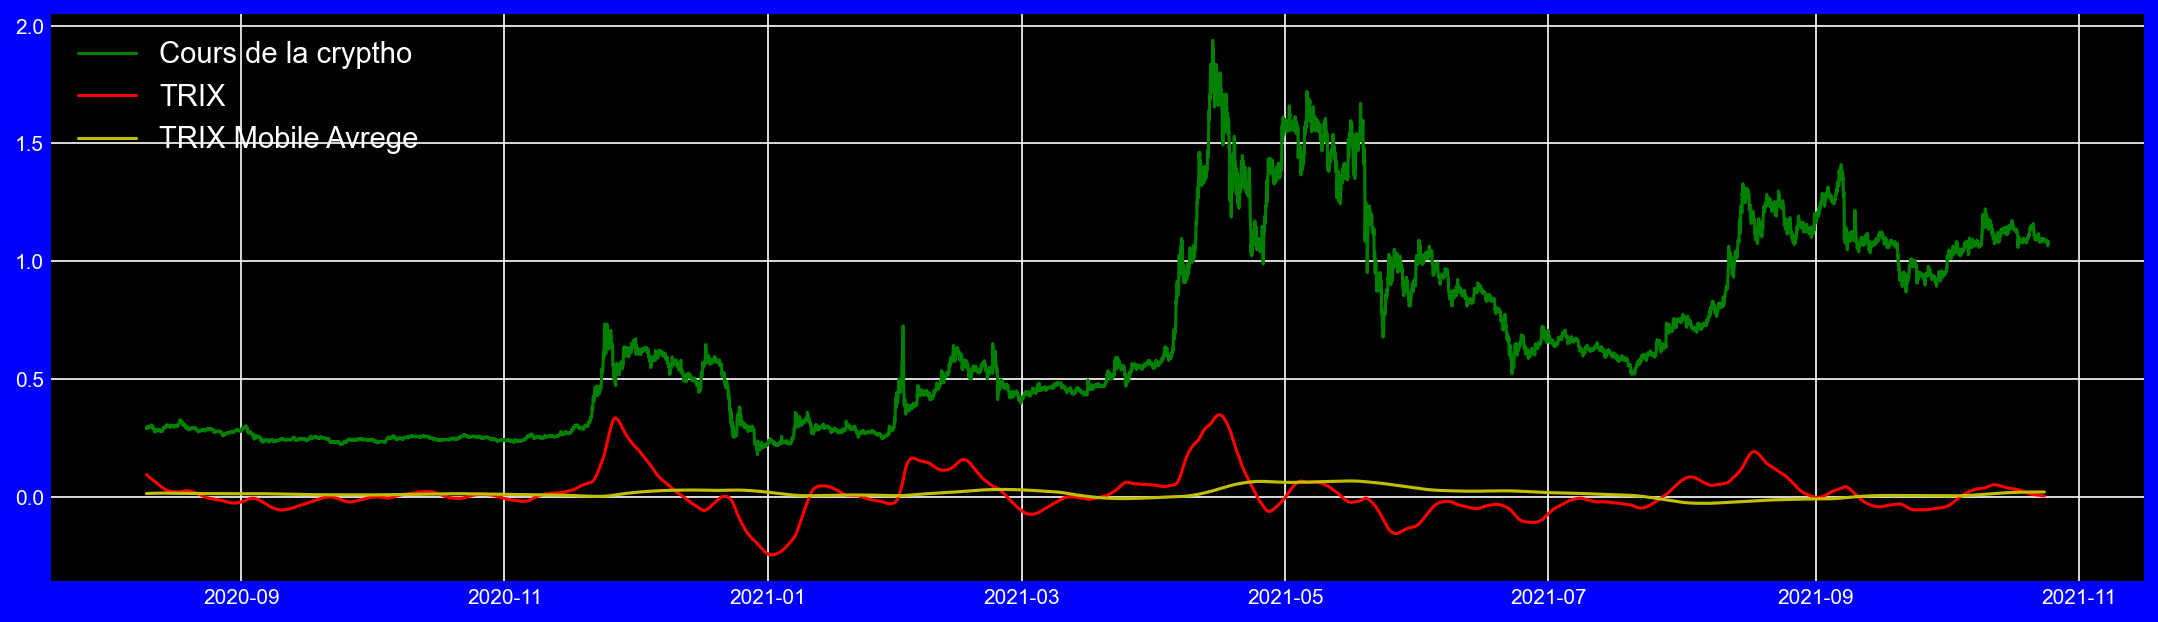

In [292]:

fig=plt.figure(figsize=(18, 5), dpi= 150, facecolor='b', edgecolor='k')  
plt.plot(df['close']["08-10-2020 00:00:00 ":"24-10-2021"] ,'g-',label="Cours de la cryptho")  
plt.plot(df['TRIX_PCT']["08-10-2020 00:00:00":"23-10-2021"],'r-', label ="TRIX" ) 
plt.plot(df['TRIX_singal']["08-10-2020 00:00:00":"23-10-2021"],'y-', label ="TRIX Mobile Avrege" )   
plt.legend(loc = 'upper left',fontsize = 14)  
plt.show() 

<font size="4">  so we have to buy since the red cruve is higer than the yellow for example just after 11-2020 and selle when the yellow one is higher than red one for example 2021-09 we have to sell and also we have to see stochastic rsi if he is between 0.2 and 0.8

In [69]:

buy_OK=True
sale_OK=True
Usdt=10000
BTC=0
lastIndex=ds.first_valid_index() 

for index, row in ds.iterrows() : 
  if ds['TRIX_histo'][lastIndex] >0 and ds['stoch_rsi'][lastIndex]<0.8  and Usdt>10 and buy_OK==True : 
    BTC=Usdt/ds["close"][index]  
    BTC=BTC-BTC*0.007 
    Usdt=0  
    print("j'ai acheter XRP à",ds['close'][index],"a la date",index) 

  if ds['TRIX_histo'][lastIndex] <0 and ds['stoch_rsi'][lastIndex]>0.2 and BTC>0.0001 and sale_OK==True :   
    Usdt=BTC*ds['close'][index ] 
    Usdt=Usdt-Usdt*0.007 
    BTC=0  
    print("j'ai vendu XRP à",ds['close'][index],"a cette date",index) 
  lastIndex=index

j'ai acheter BTC à 0.20405 a la date 2020-07-09 05:00:00
j'ai vendu BTC à 0.27853 a cette date 2020-08-22 03:00:00
j'ai acheter BTC à 0.24431 a la date 2020-10-08 11:00:00
j'ai vendu BTC à 0.24019 a cette date 2020-10-16 21:00:00
j'ai acheter BTC à 0.25011 a la date 2020-11-09 20:00:00
j'ai vendu BTC à 0.56782 a cette date 2020-12-10 12:00:00
j'ai acheter BTC à 0.31317 a la date 2021-01-10 20:00:00
j'ai vendu BTC à 0.32091 a cette date 2021-01-19 05:00:00
j'ai acheter BTC à 0.49905 a la date 2021-01-31 13:00:00
j'ai vendu BTC à 0.46752 a cette date 2021-02-23 20:00:00
j'ai acheter BTC à 0.47189 a la date 2021-03-18 19:00:00
j'ai vendu BTC à 1.24099 a cette date 2021-04-22 20:00:00
j'ai acheter BTC à 1.5546 a la date 2021-05-03 23:00:00
j'ai vendu BTC à 1.5388 a cette date 2021-05-05 15:00:00
j'ai acheter BTC à 0.6254 a la date 2021-07-26 21:00:00
j'ai vendu BTC à 1.075 a cette date 2021-09-10 19:00:00
j'ai acheter BTC à 1.0338 a la date 2021-10-04 21:00:00
j'ai vendu BTC à 1.0895 a cet

In [302]:
def simule_trix_statgy(m ,ds) : 
    
    coin=0  
    rowlist=[] 
    n=m

    for index, row in ds.iterrows() : 
        if  ds['TRIX_histo'][index] >0 and ds['stoch_rsi'][index]<0.8  and m>10 : 
           coin=m/ds["close"][index]  
           coin=coin-coin*0.007 
           m=0  
           bot_portefeuille = m +coin*ds['close'][index] 
           buyand_hold=(n/ds['close'][0])*ds['close'][index] 
           performance=((bot_portefeuille-buyand_hold)/buyand_hold)*100  
           rendement =((bot_portefeuille-n)/n)*100
           achat=["j'ai acheter cette quantité de coin ",str(coin)," à ",str(coin*ds['close'][index])," a la date ",str(index)] 
           dict1={'date':index ,'Usdt':m ,'coin':coin,"operation":"".join(achat) ,"portfolo":bot_portefeuille , "if_Ihold":buyand_hold ,"rendement %":rendement,
                  "performance %": performance}  
           rowlist.append(dict1) 
           

        if ds['TRIX_histo'][index] <0 and ds['stoch_rsi'][index]>0.2 and coin>0.0001 :   
           m=coin*ds['close'][index ] 
           m=m-m*0.007 
           coin=0 
           bot_portefeuille = m +coin*ds['close'][index] 
           buyand_hold=(n/ds['close'][0])*ds['close'][index] 
           vente = ["j'ai vendu tous les coin  à ",str(m)," a la date ",str(index)]  
           performance=((bot_portefeuille-buyand_hold)/buyand_hold)*100 
           rendement =((bot_portefeuille-n)/n)*100
           dict1={'date':index ,'Usdt':m ,'coin':coin,"operation":"".join(vente) ,"portfolo":bot_portefeuille , "if_Ihold":buyand_hold , "rendement %":rendement,
                  "performance %": performance}  
           rowlist.append(dict1)  
        
    simulate1=pd.DataFrame(rowlist)
          
            
    
    return  simulate1

In [303]:
simule_trix_statgy(200,df) 


,date,Usdt,coin,operation,portfolo,if_Ihold,rendement %,performance %
0,2020-07-09 04:00:00,0.000000,993.099310,j'ai acheter cette quantité de coin 993.099309...,198.600000,141.598810,-0.700000,40.255416
1,2020-08-22 02:00:00,272.659954,0.000000,j'ai vendu tous les coin à 272.65995400540055...,272.659954,195.772853,36.329977,39.273628
2,2020-10-08 10:00:00,0.000000,1106.959951,j'ai acheter cette quantité de coin 1106.95995...,270.751334,173.185584,35.375667,56.335954
3,2020-10-16 20:00:00,263.327042,0.000000,j'ai vendu tous les coin à 263.32704249520737...,263.327042,169.624018,31.663521,55.241602
4,2020-11-09 19:00:00,0.000000,1045.642233,j'ai acheter cette quantité de coin 1045.64223...,261.483753,177.065779,30.741877,47.676053
5,2020-12-10 11:00:00,587.451855,0.000000,j'ai vendu tous les coin à 587.4518551020077 ...,587.451855,400.601855,193.725928,46.642320
6,2021-01-10 19:00:00,0.000000,1871.477998,j'ai acheter cette quantité de coin 1871.47799...,583.339692,220.703816,191.669846,164.308838
7,2021-01-19 04:00:00,539.115357,0.000000,j'ai vendu tous les coin à 539.1153569783646 ...,539.115357,205.409616,169.557678,162.458676
8,2021-01-31 12:00:00,0.000000,1098.519585,j'ai acheter cette quantité de coin 1098.51958...,535.341549,345.061248,167.670775,55.143921
9,2021-02-23 19:00:00,493.666001,0.000000,j'ai vendu tous les coin à 493.666001335897 a...,493.666001,320.441832,146.833001,54.057914


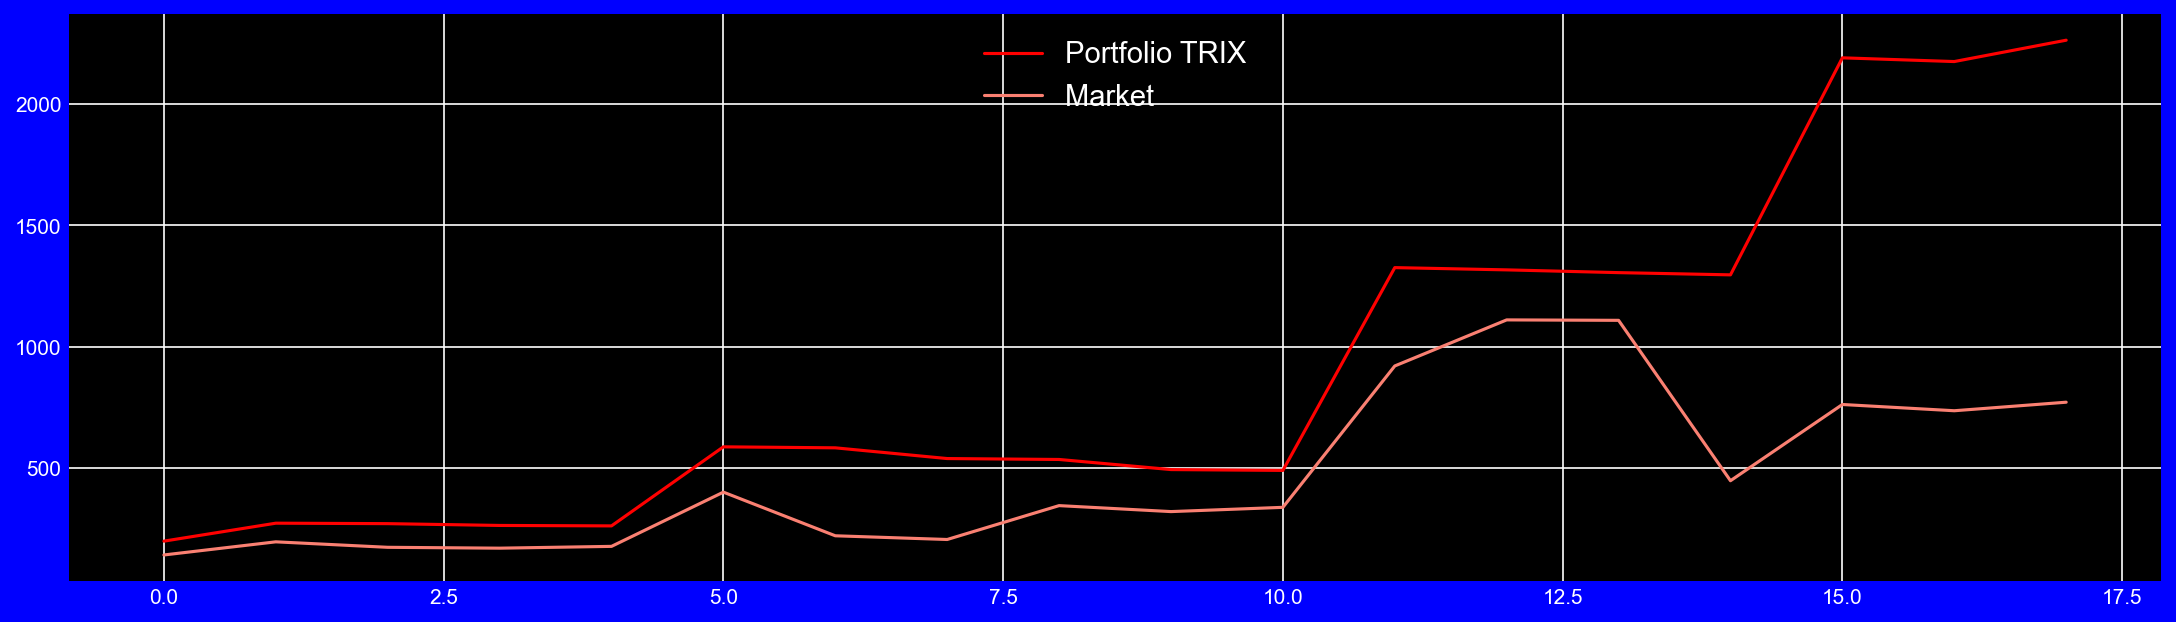

In [286]:
fig=plt.figure(figsize=(18, 5), dpi= 150, facecolor='b', edgecolor='k') 
plt.plot(simule_trix_statgy(200,df)["portfolo"] , "r-" , label="Portfolio TRIX") 
plt.plot(simule_trix_statgy(200,df)["if_Ihold"] , "salmon" , label="Market ") 
plt.legend(loc = 'upper center',fontsize = 14)

# The aligator strategy 
this a famous strategy we use five indicator this indicatirs are moving avrege but with deffrent length the moving avrege from the frist with the smallest length to the last wit the largrst lenth so to sell we should have a postive trend of all of indicators else we buy that is esay 
this stratgy is not opptimaised 

In [176]:
df['MB5']=ta.trend.ema_indicator(df['close'] , window=5)  
df['MB15'] =ta.trend.ema_indicator(df['close'] , window=15) 
df['MB75'] =ta.trend.ema_indicator(df['close'] , window=75) 
df['MB133'] =ta.trend.ema_indicator(df['close'] , window=133)  
df['MB180'] =ta.trend.ema_indicator(df['close'] , window=180)  
df['MB255'] =ta.trend.ema_indicator(df['close'] , window=255)

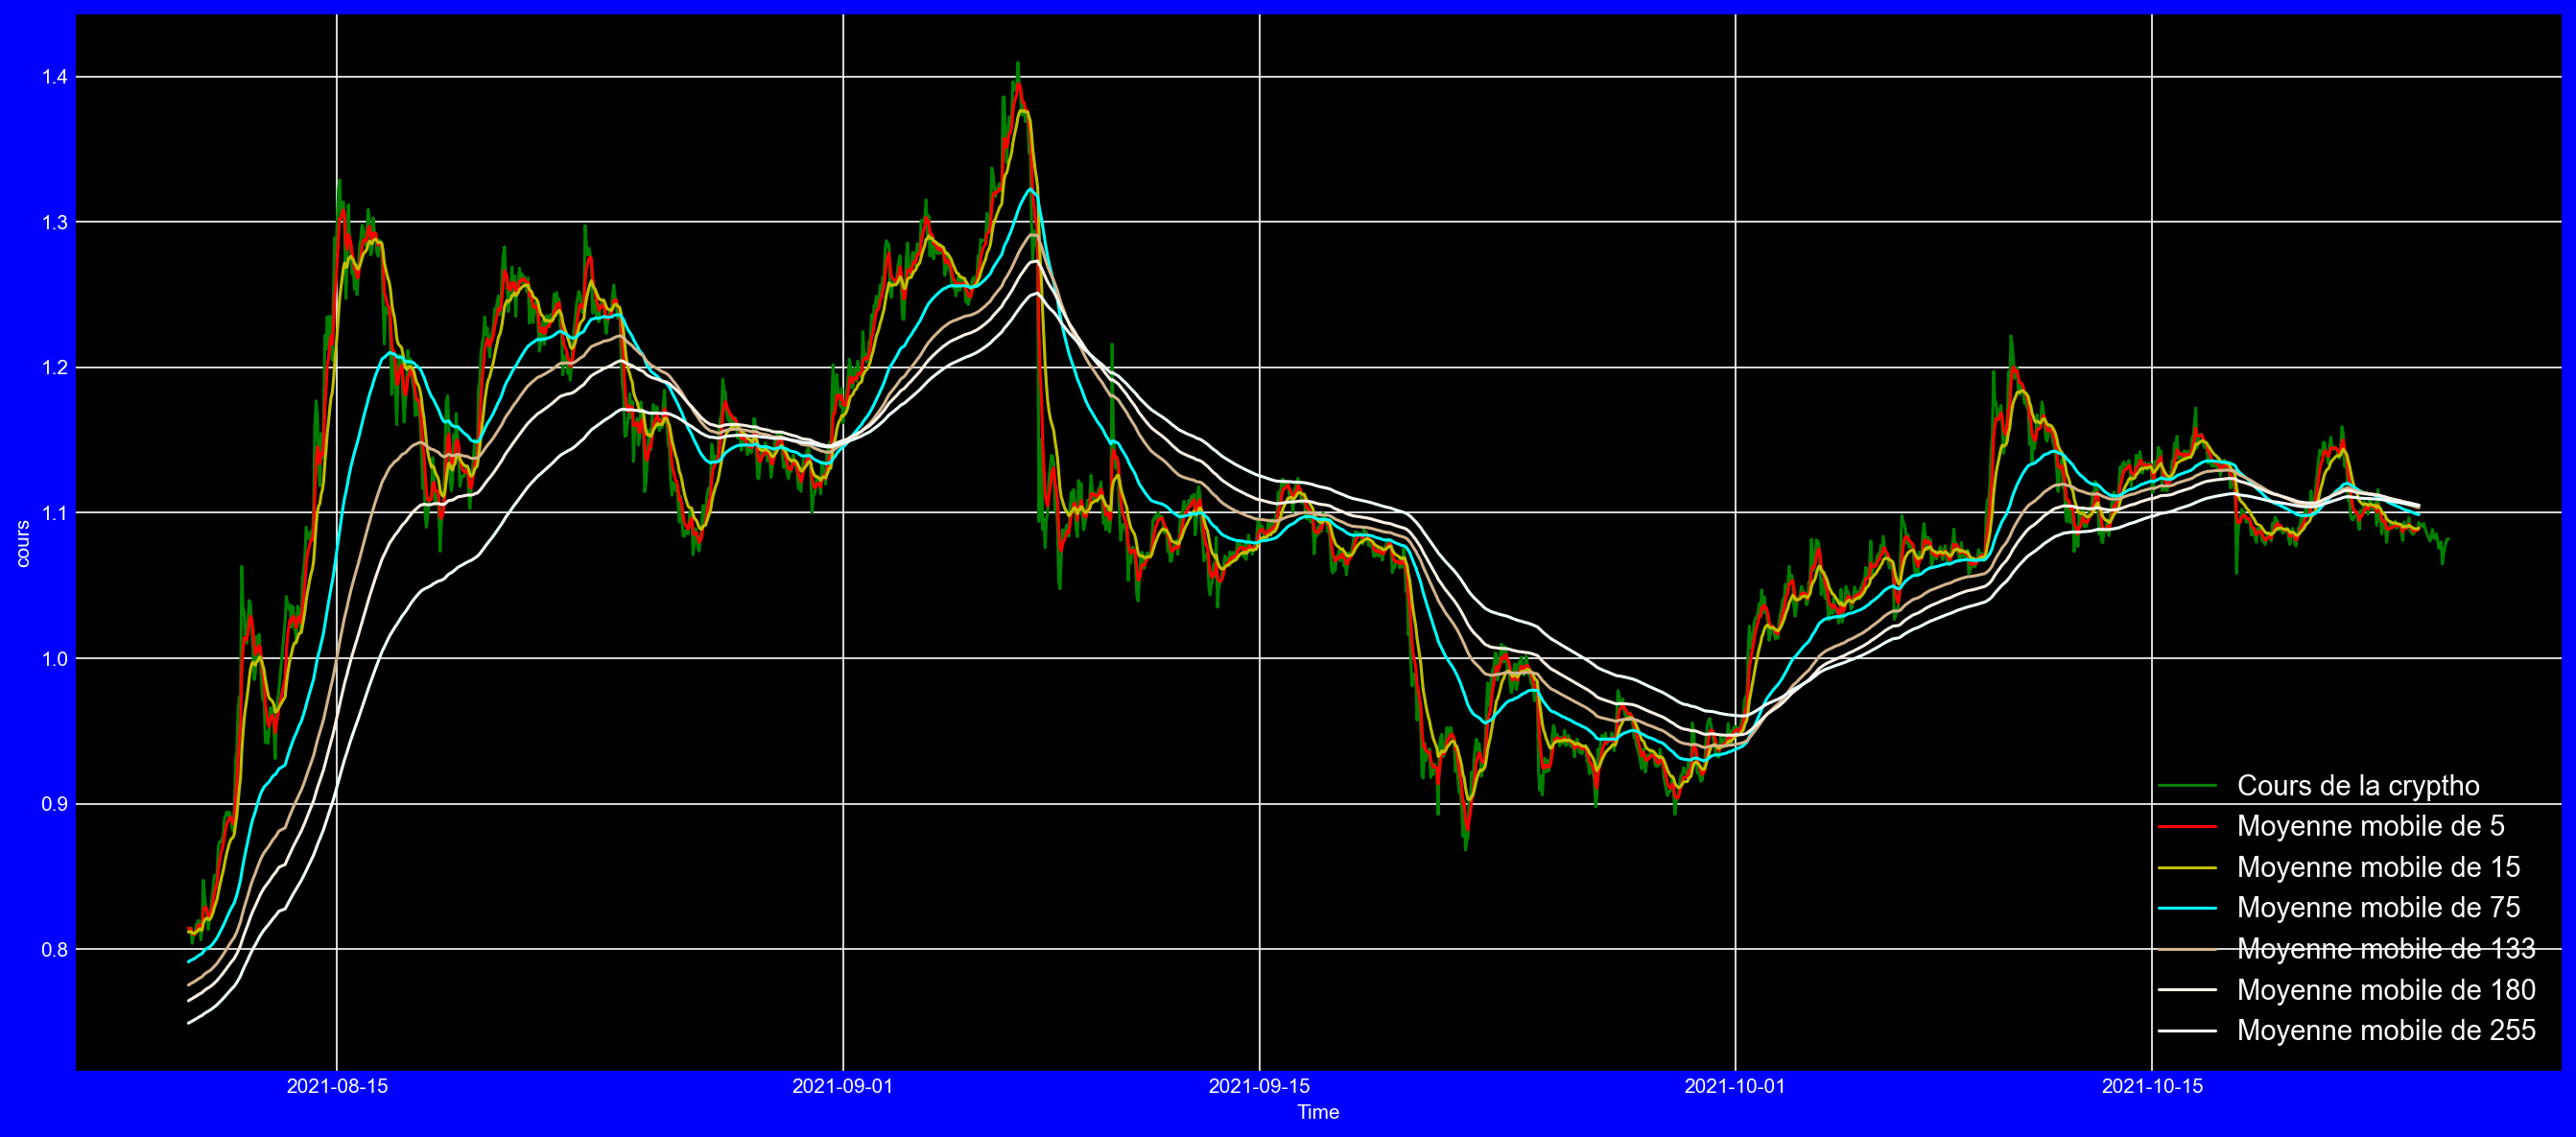

In [222]:
fig=plt.figure(figsize=(18, 8), dpi= 150, facecolor='b', edgecolor='k')
plt.plot(df['close']["08-10-2021 00:00:00 ":"24-10-2021"] ,'g-',label="Cours de la cryptho")  
plt.plot(df['MB5']["08-10-2021 00:00:00":"23-10-2021"],'r-', label ="Moyenne mobile de 5" ) 
plt.plot(df['MB15']["08-10-2021 00:00:00":"23-10-2021"],'y-', label ="Moyenne mobile de 15" ) 
plt.plot(df['MB75']["08-10-2021 00:00:00":"23-10-2021"],'aqua', label ="Moyenne mobile de 75" )
plt.plot(df['MB133']["08-10-2021 00:00:00":"23-10-2021"],'tan', label ="Moyenne mobile de 133" )
plt.plot(df['MB180']["08-10-2021 00:00:00":"23-10-2021"],'linen', label ="Moyenne mobile de 180" )
plt.plot(df['MB255']["08-10-2021 00:00:00":"23-10-2021"],'azure', label ="Moyenne mobile de 255" )
plt.xlabel("Time") 
plt.ylabel("cours") 
plt.legend(loc = 'lower right',fontsize = 14)
plt.tight_layout() 

plt.show() 

In [254]:
def buy_condition (index) :  
    if ds["MB5"][index]>ds["MB15"][index] and ds["MB15"][index]>ds["MB75"][index] and ds["MB75"][index]>ds["MB133"][index] and ds["MB133"][index] >ds["MB180"][index] and ds["MB180"][index] >ds["MB250"][index] and ds["stoch_rsi"][index]<0.8 :
        return True 
    else : 
        return False 

In [280]:
def buyCondition(row, previousRow):
  if row['MB5'] > row['MB15'] and row['MB15'] > row['MB75'] and row['MB75'] > row['MB133'] and row['MB133'] > row['MB180'] and row['MB180'] > row['MB255'] and row['stoch_rsi']<0.82:
    return True
  else:
    return False

  
def sellCondition(row, previousRow):
  if row['MB255'] > row['MB5'] and row['stoch_rsi']>0.2:
    return True
  else:
    return False


In [297]:
def simule_alig_statgy(m ,ds) : 
    
    coin=0  
    rowlist=[] 
    n=m

    for index, row in ds.iterrows() : 
        if  buyCondition(row, previousRow)==True  and m>10  :   
           coin=m/ds["close"][index]  
           coin=coin-coin*0.007 
           m=0  
           bot_portefeuille = m +coin*ds['close'][index] 
           buyand_hold=(n/ds['close'][0])*ds['close'][index] 
           performance=((bot_portefeuille-buyand_hold)/buyand_hold)*100  
           rendement =((bot_portefeuille-n)/n)*100
           achat=["j'ai acheter cette quantité de coin ",str(coin)," à ",str(coin*ds['close'][index])," a la date ",str(index)] 
           dict1={'date':index ,'Usdt':m ,'coin':coin,"operation":"".join(achat) ,"portfolo":bot_portefeuille , "if_Ihold":buyand_hold ,"rendement %":rendement,
                  "performance %": performance}  
           rowlist.append(dict1) 
          

        if sellCondition(row, previousRow )== True and coin>0.0001 :   
           m=coin*ds['close'][index ] 
           m=m-m*0.007 
           coin=0 
           bot_portefeuille = m +coin*ds['close'][index] 
           buyand_hold=(n/ds['close'][0])*ds['close'][index] 
           vente = ["j'ai vendu tous les coins  à ",str(m)," a la date ",str(index)]  
           performance=((bot_portefeuille-buyand_hold)/buyand_hold)*100 
           rendement =((bot_portefeuille-n)/n)*100
           dict1={'date':index ,'Usdt':m ,'coin':coin,"operation":"".join(vente) ,"portfolo":bot_portefeuille , "if_Ihold":buyand_hold , "rendement %":rendement,
                  "performance %": performance}  
           rowlist.append(dict1)  
           
    simulate1=pd.DataFrame(rowlist)
          
            
           
    return  simulate1 
previousRow = row

In [298]:
 simule_alig_statgy(200 ,df) 

,date,Usdt,coin,operation,portfolo,if_Ihold,rendement,performance
0,2020-03-28 23:00:00,0.000000,1132.075472,j'ai acheter cette quantité de bitcoin 1132.07...,198.600000,124.215818,-0.700000,59.883019
1,2020-03-30 00:00:00,186.350502,0.000000,j'ai vendu tous les bitcoin à 186.35050188679...,186.350502,117.375912,-6.824749,58.763838
2,2020-03-30 12:00:00,0.000000,1075.223988,j'ai acheter cette quantité de bitcoin 1075.22...,185.046048,121.857962,-7.476976,51.853884
3,2020-04-10 16:00:00,198.591720,0.000000,j'ai vendu tous les bitcoin à 198.59172017724...,198.591720,131.700064,-0.704140,50.790907
4,2020-04-12 17:00:00,0.000000,1018.655809,j'ai acheter cette quantité de bitcoin 1018.65...,197.201578,137.074276,-1.399211,43.864760
...,...,...,...,...,...,...,...,...
67,2021-10-12 12:00:00,530.372679,0.000000,j'ai vendu tous les bitcoin à 530.37267911663...,530.372679,762.515046,165.186340,-30.444300
68,2021-10-14 03:00:00,0.000000,466.194627,j'ai acheter cette quantité de bitcoin 466.194...,526.660070,799.900871,163.330035,-34.159333
69,2021-10-17 21:00:00,501.956370,0.000000,j'ai vendu tous les bitcoin à 501.95637044732...,501.956370,767.754726,150.978185,-34.620217
70,2021-10-21 01:00:00,0.000000,435.587412,j'ai acheter cette quantité de bitcoin 435.587...,498.442676,810.238618,149.221338,-38.481990


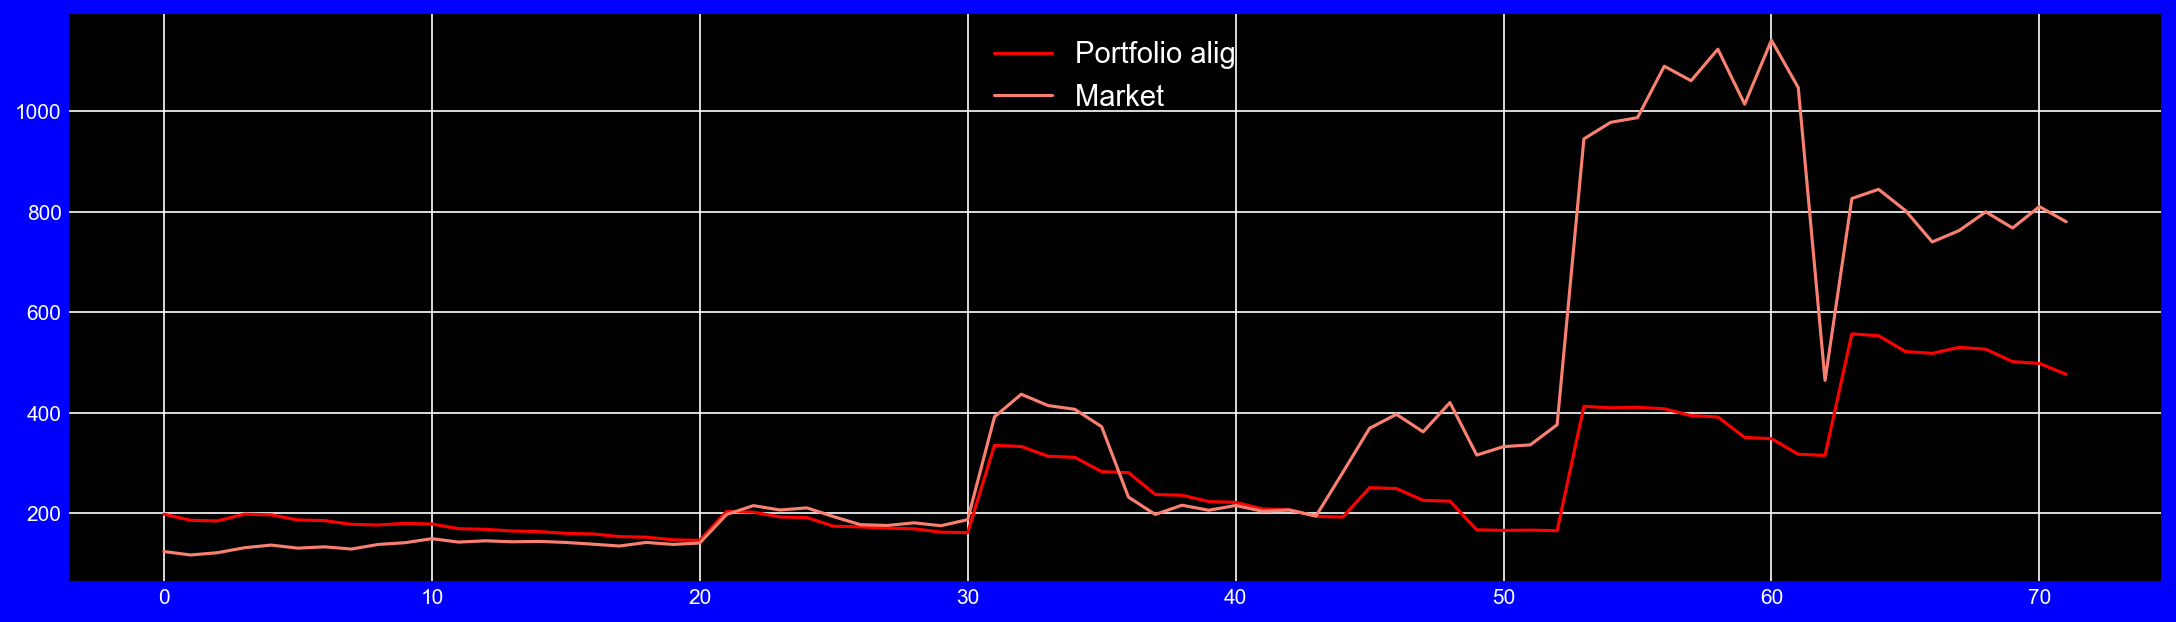

In [308]:
fig=plt.figure(figsize=(18, 5), dpi= 150, facecolor='b', edgecolor='k') 
plt.plot(simule_alig_statgy(200,df)["portfolo"] , "r-" , label="Portfolio alig") 
plt.plot(simule_alig_statgy(200,df)["if_Ihold"] , "salmon" , label="Market ") 
plt.legend(loc = 'upper center',fontsize = 14) 

Text(0, 0.5, 'Portfolio value')

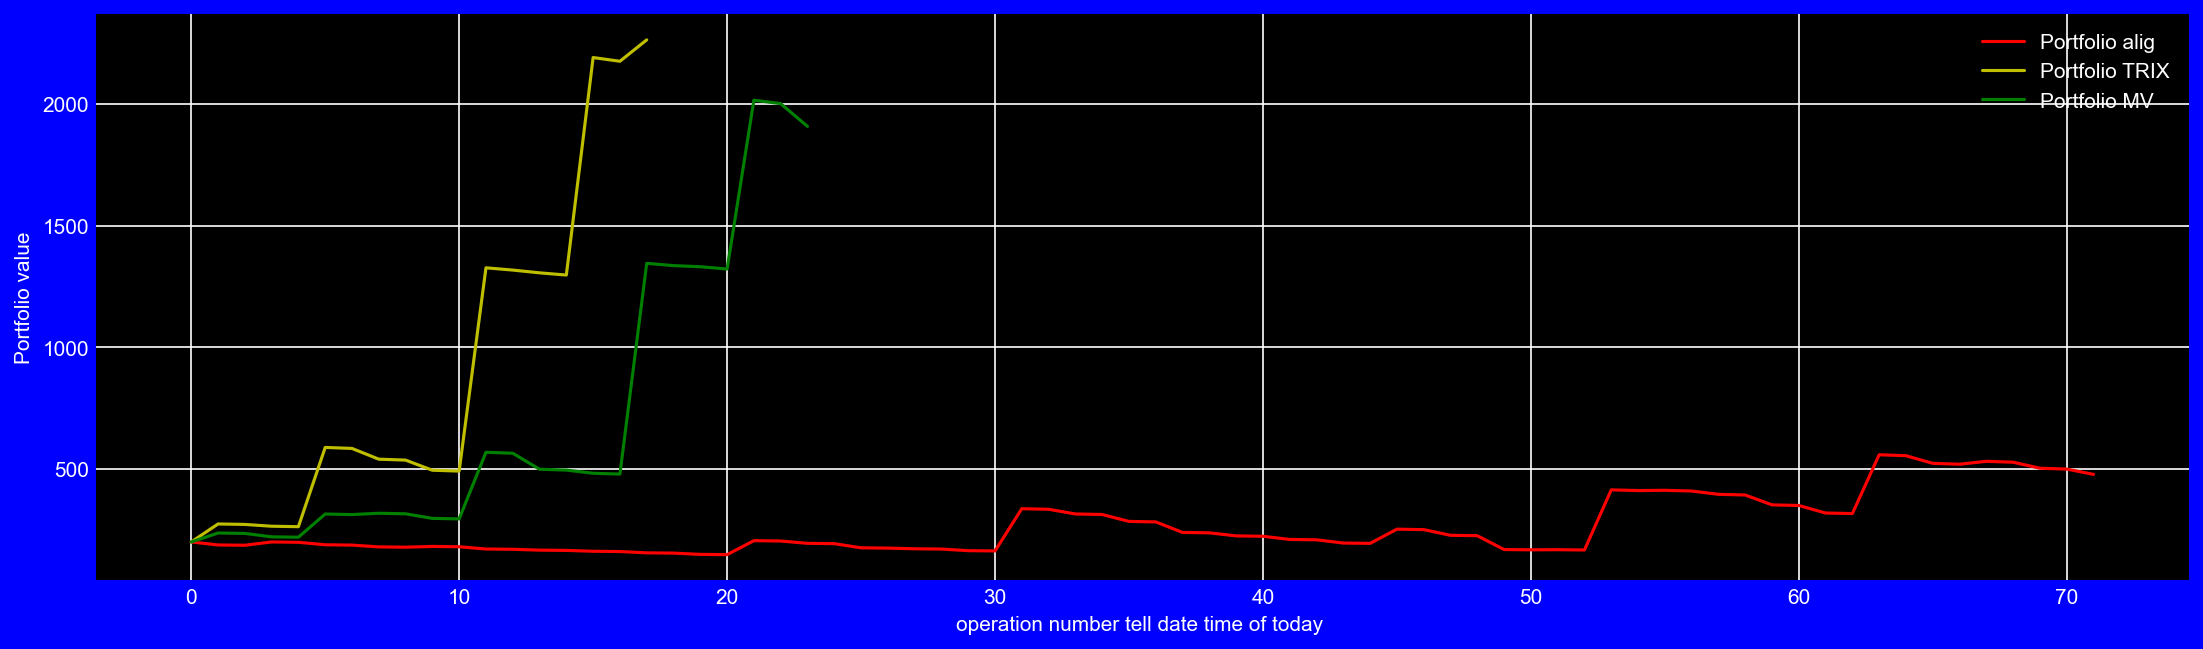

In [314]:
fig=plt.figure(figsize=(18, 5), dpi= 150, facecolor='b', edgecolor='k')  
plt.plot(simule_alig_statgy(200,df)["portfolo"] , "r-" , label="Portfolio alig") 
plt.plot(simule_trix_statgy(200,df)["portfolo"] , "y-" , label="Portfolio TRIX")  
plt.plot(simule_mb_statgy(200, df)["portfolo"] , "g-" , label="Portfolio MV")  
plt.legend()
plt.xlabel("operation number tell date time of today ") 
plt.ylabel("Portfolio value")   